In [2]:


#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

1.

In [ ]:
x=np.linalg

2.

In [26]:
import numpy as np

def sistema_masa_resorte(t, x, m, c, k):
    """
    Funcion que describe las derivadas de primer orden para el sistema masa-resorte.

    Args:
        t : El tiempo
        x : x[0] es la posición y x[1] es la velocidad
        m : La masa del objeto
        c : El coeficiente de friccion
        k : La constante del resorte

    """
    # x[0] = posicion (y)
    # x[1] = velocidad (y')

    # dx_1/dt = velocidad
    dx1_dt = x[1]

    # dx_2/dt = aceleración
    dx2_dt = -(k/m) * x[0] - (c/m) * x[1]

    return np.array([dx1_dt, dx2_dt])

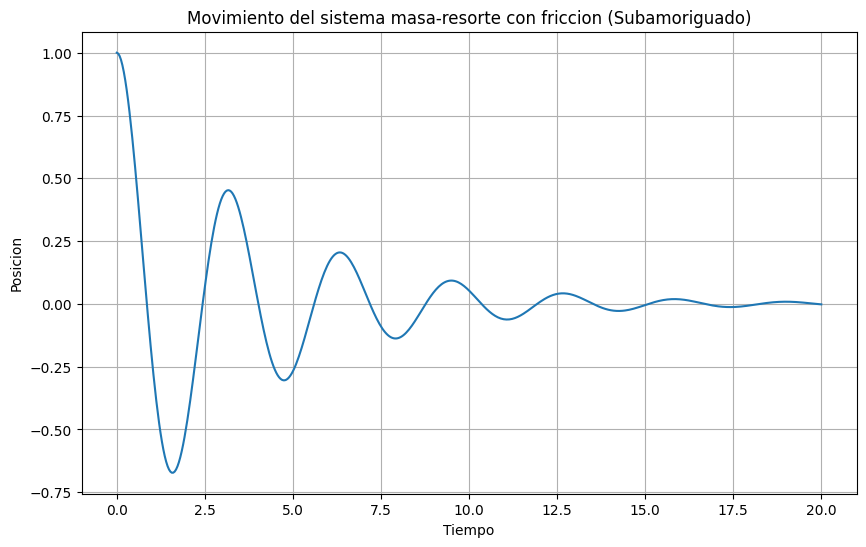

In [61]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parametros del sistema
m = 1.0
k = 4.0
c = 0.5

# Condiciones iniciales [posicion, velocidad]
x0 = [1.0, 0.0]

# Intervalo de tiempo
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver el sistema
sol = solve_ivp(
    fun=lambda t, x: sistema_masa_resorte(t, x, m, c, k),
    t_span=t_span,
    y0=x0,
    t_eval=t_eval
)

# sacamos los resultados
tiempo = sol.t
posicion = sol.y[0]

# Graficar la posicion-tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, posicion)
plt.title('Movimiento del sistema masa-resorte con friccion (Subamoriguado)')
plt.xlabel('Tiempo')
plt.ylabel('Posicion')
plt.grid(True)
plt.show()

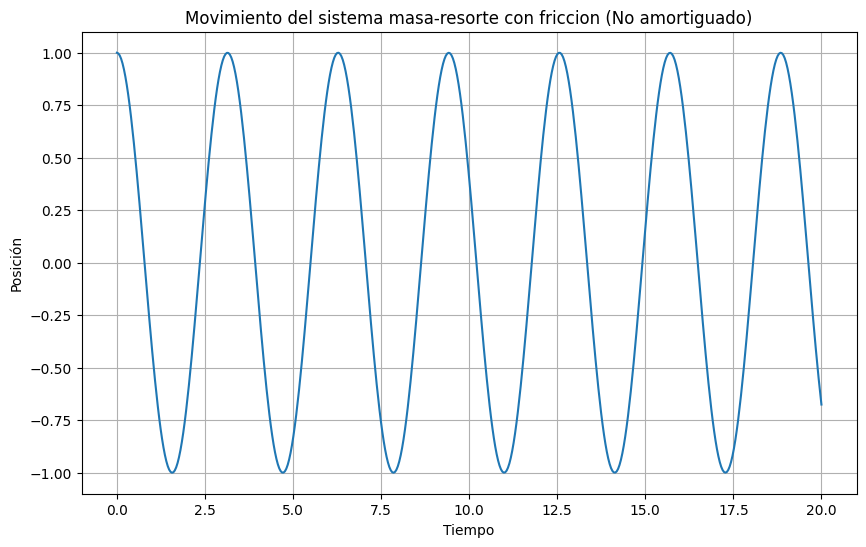

In [65]:
#Pruebas para diferentes coeficientes de friccion: friccion 0 N.s/m
# Parametros del sistema
m = 1.0
k = 4.0
c = 0

# Condiciones iniciales [posicion, velocidad]
x0 = [1.0, 0.0]

# Intervalo de tiempo
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver el sistema
sol = solve_ivp(
    fun=lambda t, x: sistema_masa_resorte(t, x, m, c, k),
    t_span=t_span,
    y0=x0,
    t_eval=t_eval
)

# sacamos los resultados
tiempo = sol.t
posicion = sol.y[0]

# Graficar la posicion-tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, posicion)
plt.title('Movimiento del sistema masa-resorte con friccion (No amortiguado)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

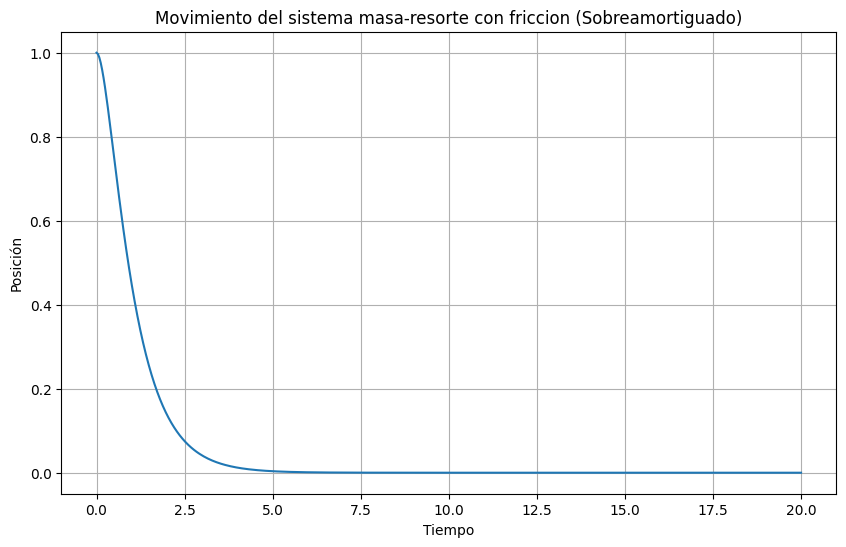

In [63]:
#Pruebas para diferentes coeficientes de friccion: friccion 4.5 N.s/m
# Parametros del sistema
m = 1.0
k = 4.0
c = 4.5

# Condiciones iniciales [posicion, velocidad]
x0 = [1.0, 0.0]

# Intervalo de tiempo
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver el sistema
sol = solve_ivp(
    fun=lambda t, x: sistema_masa_resorte(t, x, m, c, k),
    t_span=t_span,
    y0=x0,
    t_eval=t_eval
)

# sacamos los resultados
tiempo = sol.t
posicion = sol.y[0]

# Graficar la posicion-tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, posicion)
plt.title('Movimiento del sistema masa-resorte con friccion (Sobreamortiguado)')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

In [54]:
def energia_total(posicion, velocidad, m, k):
  """
  Calcula la energía mecanica total del sistema.
  """
  #Definimos la velocidad y las energias para calcular la funcion
  velocidad=sol.y[1]
  energia_cinetica = 0.5 * m * velocidad**2
  energia_potencial = 0.5 * k * posicion**2

  return energia_cinetica + energia_potencial

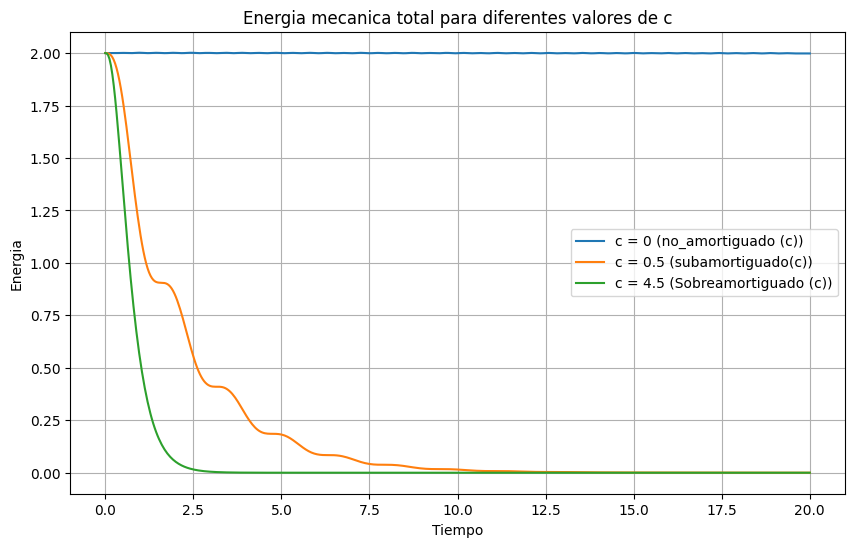

In [60]:
#Usamos los valores de c correspondientes a cada tipo de amortiguamiento
c_valores = {
    'no_amortiguado (c)': 0,
    'subamortiguado(c)': 0.5,
    'Sobreamortiguado (c)': 4.5
}

plt.figure(figsize=(10, 6))
for label, c_val in c_valores.items():
    # Resolver el sistema para el valor de 'c' usado
    sol = solve_ivp(
        fun=lambda t, x: sistema_masa_resorte(t, x, m, c_val, k),
        t_span=t_span,
        y0=x0,
        t_eval=t_eval
    )

    #los resultados de las simulaciones de c anteriores
    tiempo = sol.t
    posicion = sol.y[0]
    velocidad = sol.y[1]

    # Calcular la energía total para la simulacion actual
    energia = energia_total(posicion, velocidad, m, k)

    # Graficar la energia
    plt.plot(tiempo, energia, label=f'c = {c_val} ({label})')

plt.title('Energia mecanica total para diferentes valores de c')
plt.xlabel('Tiempo')
plt.ylabel('Energia')
plt.legend()
plt.grid(True)
plt.show()

3.

In [56]:
import numpy as np

n = 5 # Tamaño de la matriz (5x5)
num_matrices = 1000
#Funcion para usar traza, determinante y comprobar resultados
for _ in range(num_matrices):
    A = np.random.rand(n, n)

    # Propiedad de la traza
    traza_A = np.trace(A)
    autovalores = np.linalg.eigvals(A)
    suma_autovalores = np.sum(autovalores)

    # Propiedad del determinante
    determinante = np.linalg.det(A)
    producto_autovalores = np.prod(autovalores)

    # Verificacion de precision de metodos
    diferencia_traza = np.abs(traza_A - suma_autovalores)
    diferencia_det = np.abs(determinante - producto_autovalores)

    # Las diferencias deberian ser muy pequeñas, esto servira para verificar
    if diferencia_traza > 1e-9 or diferencia_det > 1e-9:
        print(f"Hay un problema. Diferencia de Traza = {diferencia_traza}, Diferencia de Det = {diferencia_det}")

print("Resultado de 1000 matrices correcto en los limites de tolerancia. Las propiedades se cumplen.")

Resultado de 1000 matrices correcto en los limites de tolerancia. Las propiedades se cumplen.
